In [42]:
import numpy as np
from astropy.table import Table
import astropy.units as u
import matplotlib.pyplot as plt

mcmc_w51e = '/home/t.yoo/job/mcmc_w51e.fits'
mcmc_w51e_tab = Table.read(mcmc_w51e, format='fits')
#mcmc_w51n = '/home/t.yoo/job/mcmc_w51n.fits'
#mcmc_w51n_tab = Table.read(mcmc_w51n, format='fits')

def get_temp(rthick, T1, T2, logrho0, alpha, verbose=True):
   
    opt_thick = 4*np.pi/3 * (rthick * u.au) **3 * 10**logrho0 * (rthick/100)**(-alpha) *u.g/u.cm**3
    opt_thin = 10**logrho0 * u.g/u.cm**3* 4* np.pi /(3-alpha) * (5**(3-alpha) - (rthick/100)**(3-alpha)) * u.au**3
    if verbose:
        print('opt_thick', opt_thick.to(u.Msun))
        print('opt_thin', opt_thin.to(u.Msun))
        print('T1,T2', T1,T2)
        print('weighted temp', (opt_thick * T1 + opt_thin * T2)/(opt_thick+opt_thin))
    temp_weighted = (opt_thick * T1 + opt_thin * T2)/(opt_thick+opt_thin)
    return opt_thick.to(u.Msun).value, opt_thin.to(u.Msun).value, temp_weighted

rthick_med = mcmc_w51e_tab['rthick_med']
rthick_upp = mcmc_w51e_tab['rthick_upp']
rthick_low = mcmc_w51e_tab['rthick_low']

T1_med = mcmc_w51e_tab['t1_med']
T1_upp = mcmc_w51e_tab['t1_upp']
T1_low = mcmc_w51e_tab['t1_low']

T2_med = mcmc_w51e_tab['t2_med']
T2_upp = mcmc_w51e_tab['t2_upp']
T2_low = mcmc_w51e_tab['t2_low']

logrho0_med = mcmc_w51e_tab['logrho0_med']
logrho0_upp = mcmc_w51e_tab['logrho0_upp']
logrho0_low = mcmc_w51e_tab['logrho0_low']

alpha_med = mcmc_w51e_tab['alpha_med']
alpha_upp = mcmc_w51e_tab['alpha_upp']
alpha_low = mcmc_w51e_tab['alpha_low']


opt_thick_upp = []
opt_thick_low = []
opt_thin_upp = []
opt_thin_low = []
opt_thick_med, opt_thin_med, temp_weighted_med = get_temp(rthick_med, T1_med, T2_med, logrho0_med, alpha_med,verbose=False)
for i in range(len(rthick_med)):
    rthick_arr = np.linspace(rthick_low[i], rthick_upp[i], num=1000)
    T1_arr = np.linspace(T1_low[i], T1_upp[i], num=1000)
    T2_arr = np.linspace(T2_low[i], T2_upp[i], num=1000)
    logrho0_arr = np.linspace(logrho0_low[i], logrho0_upp[i], num=1000)
    alpha_arr = np.linspace(alpha_low[i], alpha_upp[i],num=1000)
    opt_thick_arr, opt_thin_arr, temp_weighted_arr = get_temp(rthick_arr, T1_arr, T2_arr, logrho0_arr, alpha_arr, verbose=False)
    print(np.min(opt_thin_arr), opt_thin_med[i], np.max(opt_thin_arr))
    
    opt_thick_upp.append(np.max(opt_thick_arr))
    opt_thick_low.append(np.min(opt_thick_arr))
    opt_thin_upp.append(np.max(opt_thin_arr))
    opt_thin_low.append(np.min(opt_thin_arr))

opt_thick_upp = np.array(opt_thick_upp)
opt_thick_low = np.array(opt_thick_low)
opt_thin_upp = np.array(opt_thin_upp)
opt_thin_low = np.array(opt_thin_low)


1.8101489684158916e-05 1.9953347266754913e-05 2.0304045429900192e-05
nan nan nan
1.1626036717054474e-09 9.054673922302266e-09 3.405013704736216e-07
6.95886596428956e-06 8.856119197597767e-06 1.0089624953498246e-05
nan nan nan
3.3144400171061605e-06 3.83153656158077e-06 3.967761280334655e-06
1.8801799851967108e-05 2.0358863296975008e-05 2.148951032534042e-05
2.057303461658752e-06 1.0501693516467815e-05 8.884589025066664e-06
1.0384911214402695e-06 1.9338935244191196e-06 2.621681094711511e-06
1.7867508746358841e-09 1.1412893308848014e-08 2.269994714842677e-07
7.540040616949931e-05 0.00016387079031820442 0.0005107806712045501
2.0782317684516552e-06 1.1737409380490175e-05 2.4022282757188545e-05
3.1928332697744753e-06 4.468376102933734e-06 5.017941523661792e-06
2.6820710927659357e-05 3.9274599529529697e-05 3.08278009842781e-05
nan nan nan
3.4486574742638076e-09 3.806405828925044e-07 1.4532511572274289e-07
9.505803620646385e-06 0.00011898371426784266 0.29520298252088895
1.916684175446176e-05 

/scratch/local/24194812/ipykernel_3160419/288414633.py:13: RuntimeWarning: overflow encountered in power
  opt_thick = 4*np.pi/3 * (rthick * u.au) **3 * 10**logrho0 * (rthick/100)**(-alpha) *u.g/u.cm**3
/scratch/local/24194812/ipykernel_3160419/288414633.py:14: RuntimeWarning: overflow encountered in power
  opt_thin = 10**logrho0 * u.g/u.cm**3* 4* np.pi /(3-alpha) * (5**(3-alpha) - (rthick/100)**(3-alpha)) * u.au**3
/scratch/local/24194812/ipykernel_3160419/288414633.py:14: RuntimeWarning: invalid value encountered in subtract
  opt_thin = 10**logrho0 * u.g/u.cm**3* 4* np.pi /(3-alpha) * (5**(3-alpha) - (rthick/100)**(3-alpha)) * u.au**3


Text(0.5, 0, '$\\alpha$')

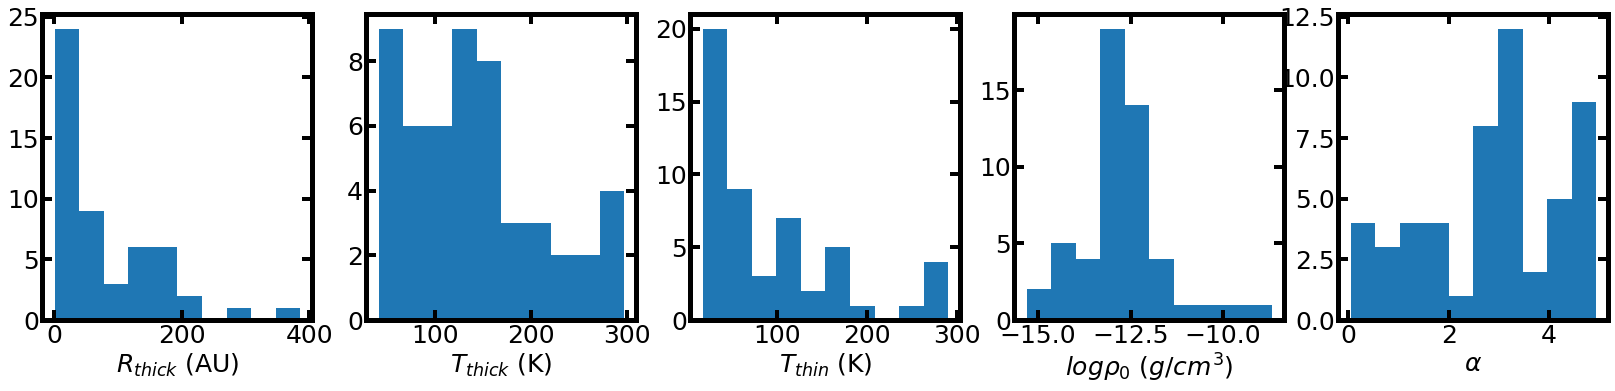

In [37]:
import matplotlib as mpl
plt.rcParams['axes.labelsize']=25
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.rcParams['axes.titlesize']=25
mpl.rcParams['axes.linewidth'] = 5
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 2
params = {"xtick.top": True, "ytick.right": True, "xtick.direction": "in", "ytick.direction": "in"}
plt.rcParams.update(params)

fig = plt.figure(figsize=(25,5))
ax1 = fig.add_axes([0.05,0.1,0.15,0.85])
ax2 = fig.add_axes([0.23,0.1,0.15,0.85])
ax3 = fig.add_axes([0.41,0.1,0.15,0.85])
ax4 = fig.add_axes([0.59,0.1,0.15,0.85])
ax5 = fig.add_axes([0.77,0.1,0.15,0.85])

ind = np.where((rthick_med>0)&np.isfinite(rthick_med))[0]
ax1.hist(rthick_med[ind])
ax2.hist(T1_med[ind])
ax3.hist(T2_med[ind])
ax4.hist(logrho0_med[ind])
ax5.hist(alpha_med[ind])
ax1.set_xlabel('$R_{thick}$ (AU)' )
ax2.set_xlabel('$T_{thick}$ (K)')
ax3.set_xlabel('$T_{thin}$ (K)')
ax4.set_xlabel(r'$log \rho_0$ $(g/cm^3)$')
ax5.set_xlabel(r'$\alpha$')



[[ 1.85185758e-06  7.89207025e-09  1.89725323e-06  5.17096544e-07
   1.55706345e-06  8.44439005e-06  8.95402403e-07  9.62614243e-09
   8.84703841e-05  9.65917761e-06  1.27554283e-06  1.24538886e-05
   3.77191925e-07  1.09477911e-04  1.55734358e-05 -5.61338704e-10
   7.27023492e-05  1.30256975e-04  8.46899071e-05  4.18981695e-06
   2.29875596e-06  2.66674698e-05  5.43925908e-05  1.28206139e-04
   8.04659023e-06  8.08746412e-06  2.84827520e-08  7.35926544e-04
   1.84823925e-07  2.17371626e-06  4.70175262e-08  1.44943939e-05
  -1.95920174e-06  9.52161527e-06  3.46416911e-03  1.25489467e-06
   1.71555267e-05  1.36347816e-05  7.88769188e-06  2.19842047e-05
  -8.48410834e-08  4.53558519e-08  8.10422621e-06  7.49759555e-01
   4.17482169e-03  5.11297466e-07  1.90062000e-06  7.18129888e-06
   3.84627955e-07  4.72318163e-06 -2.47081062e-08  4.84326519e-06]
 [ 3.50698163e-07  3.31446697e-07  1.23350576e-06  1.36224719e-07
   1.13064703e-06 -1.61710449e-06  6.87787570e-07  2.15586578e-07
   3.4690

Text(0, 0.5, 'envelope mass (Msun)')

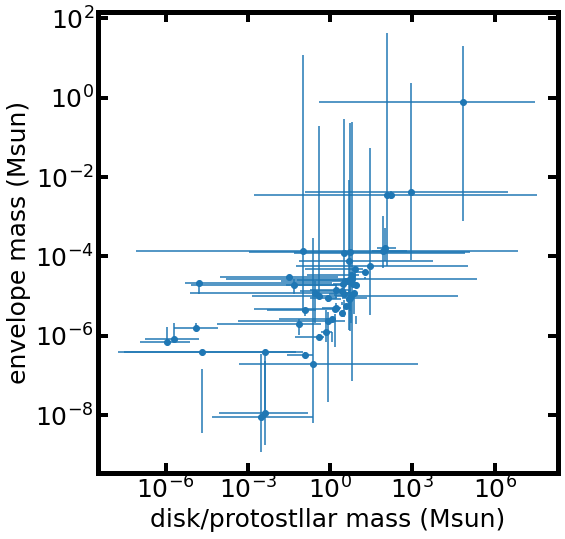

In [40]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
opt_thick_error = np.array(list(zip(opt_thick_med[ind]-opt_thick_low[ind], opt_thick_upp[ind]-opt_thick_med[ind]))).T
opt_thin_error = np.array(list(zip(opt_thin_med[ind]-opt_thin_low[ind], opt_thin_upp[ind]-opt_thin_med[ind]))).T
print(opt_thin_error)
ax1.errorbar(opt_thick_med[ind], opt_thin_med[ind], xerr = opt_thick_error, yerr=opt_thin_error, fmt='o')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('disk/protostllar mass (Msun)')
ax1.set_ylabel('envelope mass (Msun)')